## Graduate Admissions Predictor (Indian)

In this notebook i'll implement linear regression to predict the chance/probability of admission into a US university of a particular rating. 

The dataset being used is :- Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019.
It can be found here : https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict_Ver1.1.csv

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# removing first column
dataset = dataset.drop('Serial No.', axis = 1)

In [4]:
print('No of data points :- ', dataset.shape[0])
print('No of features/attributes :- ', dataset.shape[1])

No of data points :-  500
No of features/attributes :-  8


In [5]:
print(dataset.columns)
print(len(dataset.columns))

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')
8


## Various Data Visualizations

Data Visualization to understand effect of different features on each other and ultimately the chnace of admit. 

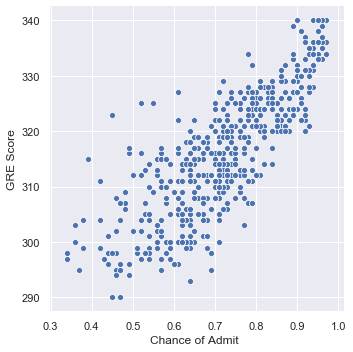

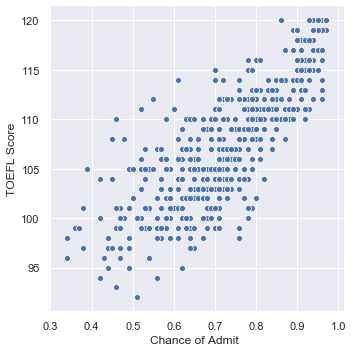

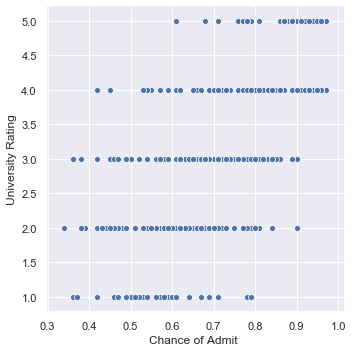

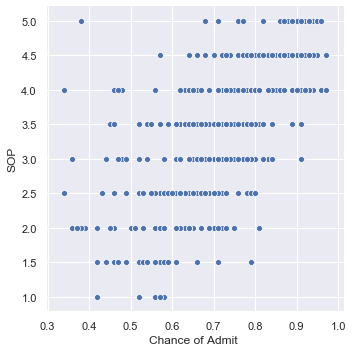

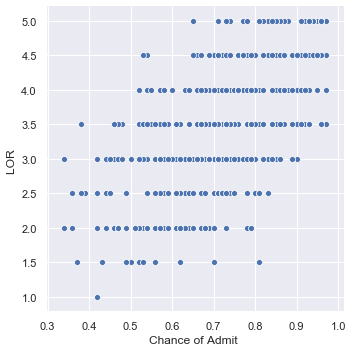

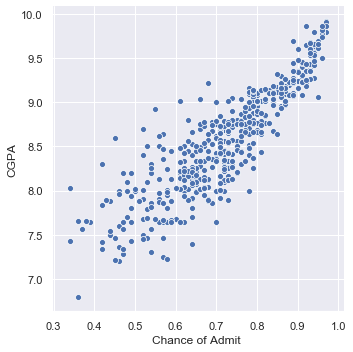

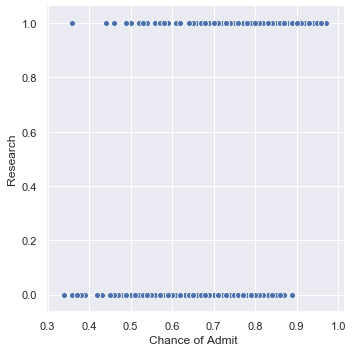

In [6]:
for i in range(len(dataset.columns) - 1):
    sns.relplot(x='Chance of Admit ', y=dataset.columns[i], data=dataset)
    plt.show()

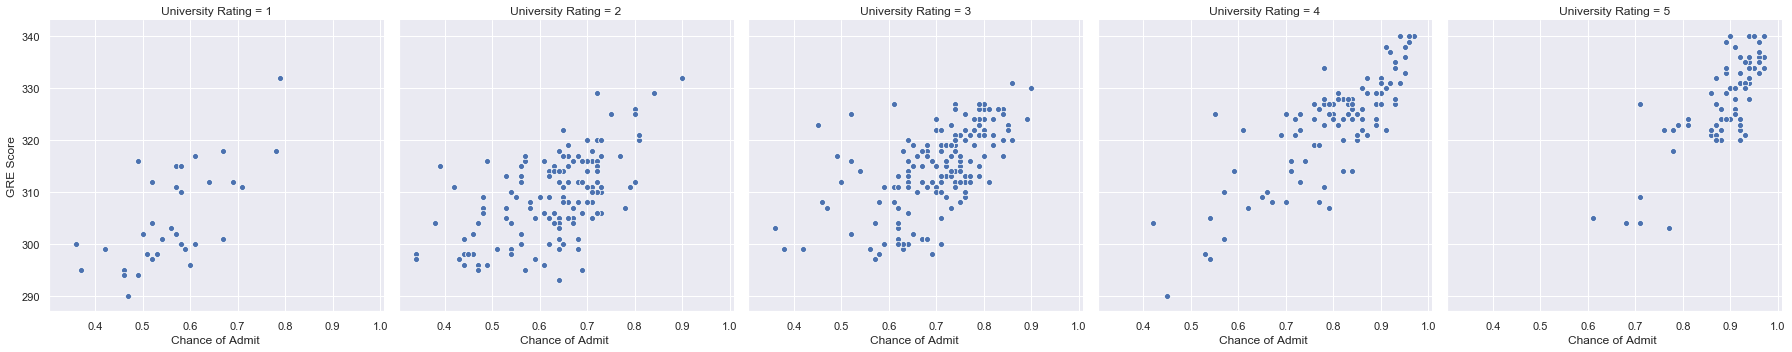

In [7]:
# Seeing how chance of admit relates with gre scores based on university ratings
sns.relplot(x="Chance of Admit ", y="GRE Score", col="University Rating", data=dataset)

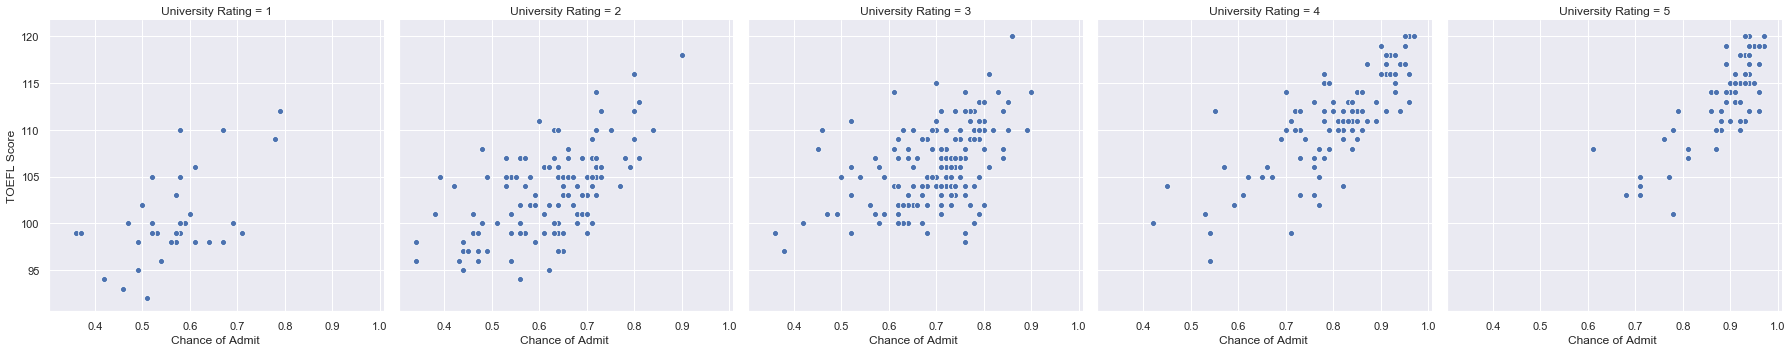

In [8]:
# Seeing how chance of admit relates with toefl scores based on university ratings
sns.relplot(x="Chance of Admit ", y="TOEFL Score", col="University Rating", data=dataset)

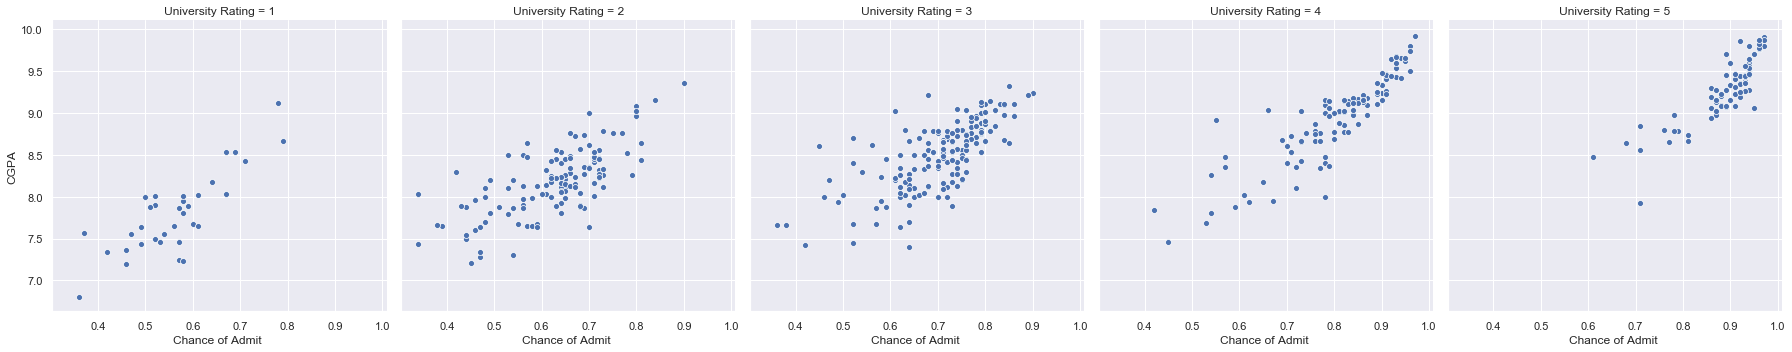

In [9]:
# Seeing how chance of admit realtes with cgpa based on university ratings
sns.relplot(x="Chance of Admit ", y="CGPA", col="University Rating", data=dataset)

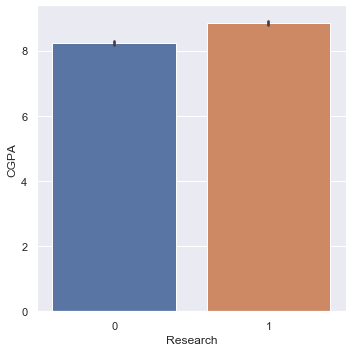

In [11]:
# Statistical estimation of research done or not by various cgpa ranges
sns.catplot(x="Research", y="CGPA", kind="bar", data=dataset)

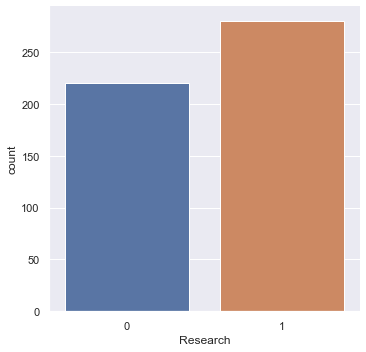

In [13]:
# Plot showing number of people how have and haven't done research
sns.catplot(x="Research", kind="count", data=dataset)

## Linear Regression Model

Implementing Linear Regression (Sklearn) as the algrothim on this dataset. What the plots show is that **CGPA, TOEFL Score, GRE Score** significantly affect the chances of admit. 

Further, the above mentioned are also realted to the **Universty Rating** in the way that higher the University Rating, higher the values required for these features.

In [14]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [115]:
# Preparing for fitting
X = dataset.iloc[:, :-1]
# Adding bias column to X
Y = dataset.iloc[:, -1]

# Normalize function (Feature scaling)
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X = (X - mu)/sigma
    return X

X = normalize(X)
X['Research'] = dataset['Research']
X['University Rating'] = dataset['University Rating']
bias = [1]*(dataset.shape[0])
X['bias'] = bias

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((375, 8), (375,), (125, 8), (125,))

In [122]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,bias
0,1.819238,1.778865,4,1.137360,1.098944,1.776806,1,1
1,0.667148,-0.031601,4,0.632315,1.098944,0.485859,1,1
2,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,1,1
3,0.489904,0.462163,3,0.127271,-1.064332,0.154847,1,1
4,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,0,1


In [116]:
clf = LinearRegression()
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
# Theta values calculated
print(clf.coef_)
# intercept value
print(clf.intercept_)

[0.02443046 0.02011865 0.00237087 0.00120129 0.01576605 0.07058767
 0.024134   0.        ]
0.7014808621107917


In [119]:
# Predict
Y_pred = clf.predict(X_test)
Y_pred

array([0.91581583, 0.79674376, 0.56909668, 0.70945734, 0.81650072,
       0.86135096, 0.47639462, 0.65176984, 0.82615993, 0.80865704,
       0.72005426, 0.72690226, 0.65094477, 0.93501136, 0.82540855,
       0.50986056, 0.83574958, 0.59657622, 0.53444548, 0.5713012 ,
       0.66553166, 0.55195809, 0.7212792 , 0.7930736 , 0.77950625,
       0.60351355, 0.9512945 , 0.84596688, 0.62664333, 0.74353985,
       0.55443646, 0.73108031, 0.54404387, 0.86290291, 0.65361131,
       0.73643819, 0.5542965 , 0.95895494, 0.64428758, 0.71010946,
       0.96903098, 0.5730394 , 0.66959559, 0.85815072, 0.94009082,
       0.57819593, 0.95944447, 0.8380705 , 0.79230736, 0.92731629,
       0.88976294, 0.56303567, 0.70480169, 0.52289182, 0.95415762,
       0.59125172, 0.95701622, 0.73982349, 0.66603689, 0.49881713,
       0.63096427, 0.68058603, 0.59943022, 0.58948087, 0.43851058,
       0.5870312 , 0.86801123, 0.89828002, 0.65849933, 0.7066275 ,
       0.61685883, 0.78452495, 0.68913226, 0.56090931, 0.55522

In [120]:
# Check score - R2 Score
print('The Score is :- ', clf.score(X_test, Y_test))

The Score is :-  0.8163213016062119
